In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [274]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [275]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [3]:
df.drop("CustomerID",1,inplace=True)

In [4]:
df["Genre"]=df["Genre"].apply(lambda x: 1 if x=="Female" else 0)

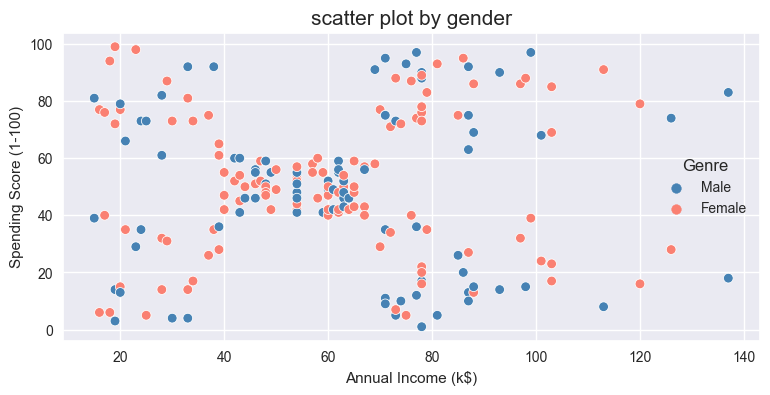

In [210]:
plt.figure(figsize=(9,4))
sns.scatterplot(df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre", palette=["steelblue","salmon"])
plt.title("scatter plot by gender", fontsize=15)
plt.show()

In [319]:
centers = kmeans.cluster_centers_

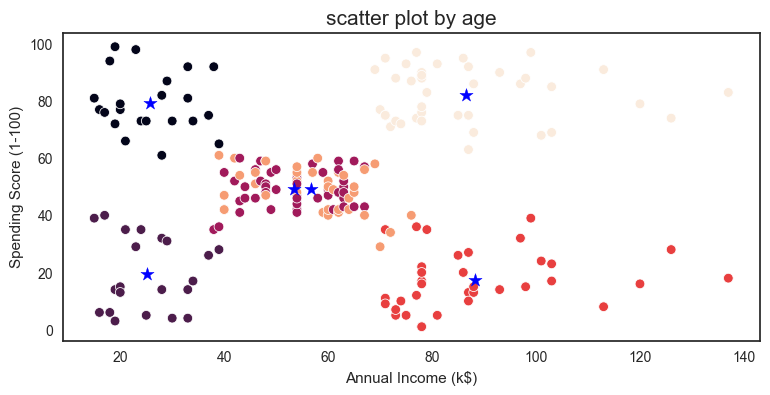

In [334]:
plt.figure(figsize=(9,4))
sns.set_style('white')
sns.scatterplot(df, x="Annual Income (k$)", y="Spending Score (1-100)",c=kmeans.labels_ , palette="deep")
plt.scatter(centers[:,2], centers[:,3], color='blue', marker='*', s=100)
plt.title("scatter plot by age", fontsize=15)
plt.show()

# Elbow Method

In [306]:
sse={}
for i in range(2,15):
    kmeans=KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(df)
    sse[i]=kmeans.inertia_

In [307]:
sse

{2: 212889.44245524297,
 3: 143391.5923603568,
 4: 104414.67534220166,
 5: 75399.61541401484,
 6: 58348.64136331504,
 7: 51165.18423710792,
 8: 44389.80767355768,
 9: 40680.528811902426,
 10: 37425.924025974025,
 11: 34799.391646664226,
 12: 31769.253588909574,
 13: 29868.745428633978,
 14: 28080.198517957142}

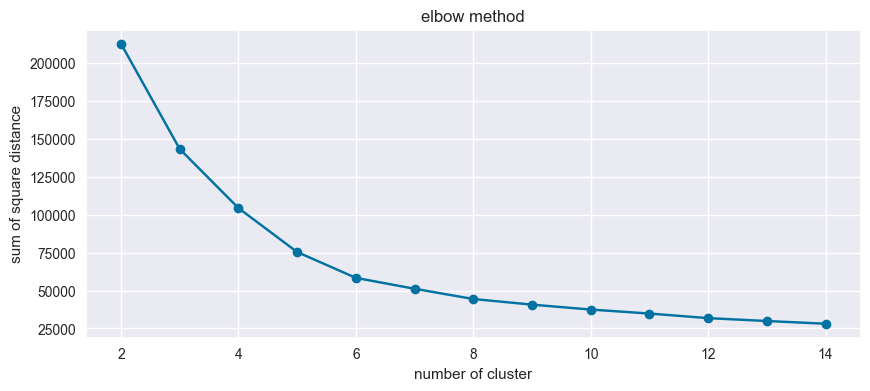

In [308]:
plt.figure(figsize=(10,4))
plt.plot(sse.keys(), sse.values(),marker="o")
plt.title("elbow method")
plt.ylabel("sum of square distance")
plt.xlabel("number of cluster")
plt.show()

In [309]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(df)

KMeans(n_clusters=6)

In [310]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 4,
       1, 0, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 5, 4, 5, 3, 5, 3, 5, 3, 5,
       4, 5, 3, 5, 3, 5, 3, 5, 3, 5, 4, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5])

In [311]:
kmeans.cluster_centers_

array([[ 0.59090909, 25.27272727, 25.72727273, 79.36363636],
       [ 0.61904762, 44.14285714, 25.14285714, 19.52380952],
       [ 0.55555556, 56.15555556, 53.37777778, 49.08888889],
       [ 0.42857143, 41.68571429, 88.22857143, 17.28571429],
       [ 0.65789474, 27.        , 56.65789474, 49.13157895],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513]])

# Silhouette Method

In [240]:
avg={}
for i in range(2,15):
    cluster=KMeans(n_clusters=i)
    cluster.fit(df)
    silhouette_avg=silhouette_score(df,cluster.labels_, metric='euclidean')
    avg[i]=round(silhouette_avg,3)

In [241]:
avg

{2: 0.293,
 3: 0.384,
 4: 0.406,
 5: 0.44,
 6: 0.452,
 7: 0.441,
 8: 0.428,
 9: 0.407,
 10: 0.38,
 11: 0.369,
 12: 0.367,
 13: 0.354,
 14: 0.351}

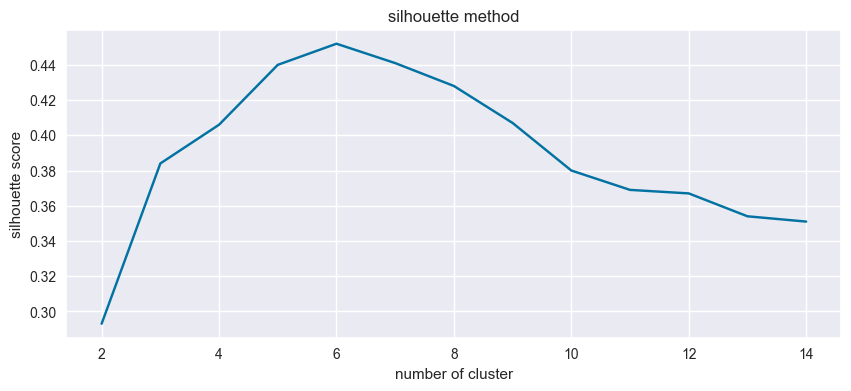

In [246]:
plt.figure(figsize=(10,4))
plt.plot(avg.keys(), avg.values())
plt.title("silhouette method")
plt.ylabel("silhouette score")
plt.xlabel("number of cluster")
plt.show()

### KElbowVisualizer

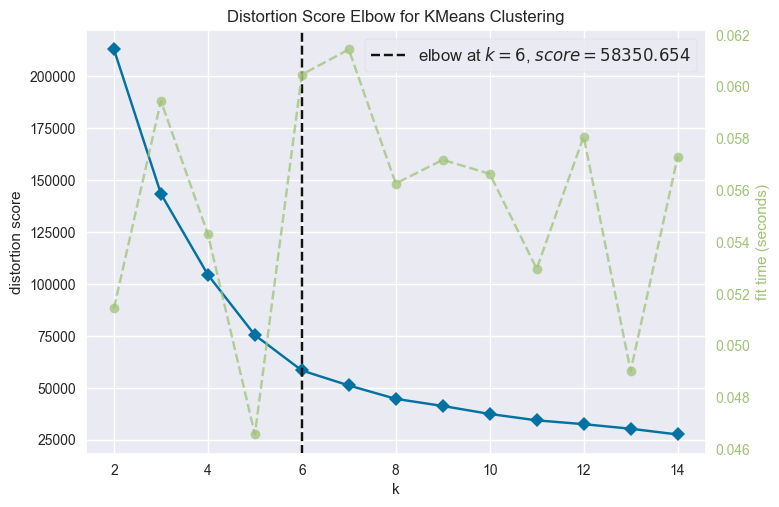

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [247]:
kmeans=KMeans()
elbow=KElbowVisualizer(kmeans, k=(2,15))
elbow.fit(df)
elbow.show()

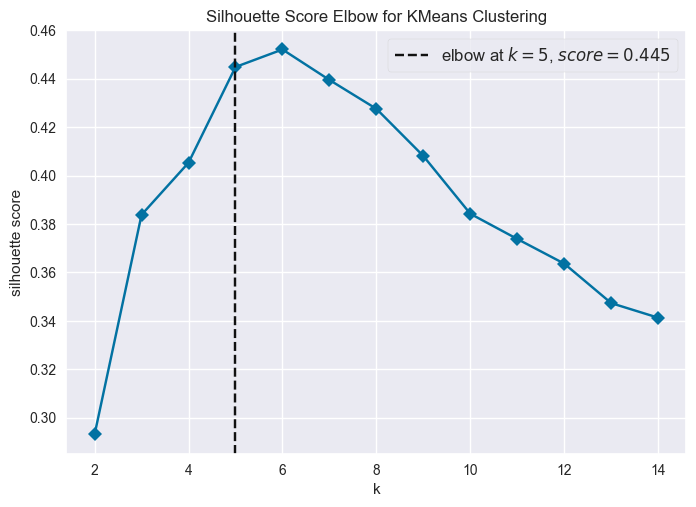

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [248]:
kmeans=KMeans()
elbow=KElbowVisualizer(kmeans, k=(2,15),metric='silhouette',locate_elbow=True, timings=False )
elbow.fit(df)
elbow.show()

For n_clusters = 2 The average silhouette_score is : 0.2546107044763696
For n_clusters = 3 The average silhouette_score is : 0.33545193002465656
For n_clusters = 4 The average silhouette_score is : 0.3571039030106138
For n_clusters = 5 The average silhouette_score is : 0.4440669204743008
For n_clusters = 6 The average silhouette_score is : 0.4506609653808789
For n_clusters = 7 The average silhouette_score is : 0.43721773098699485
For n_clusters = 8 The average silhouette_score is : 0.3883746169635349


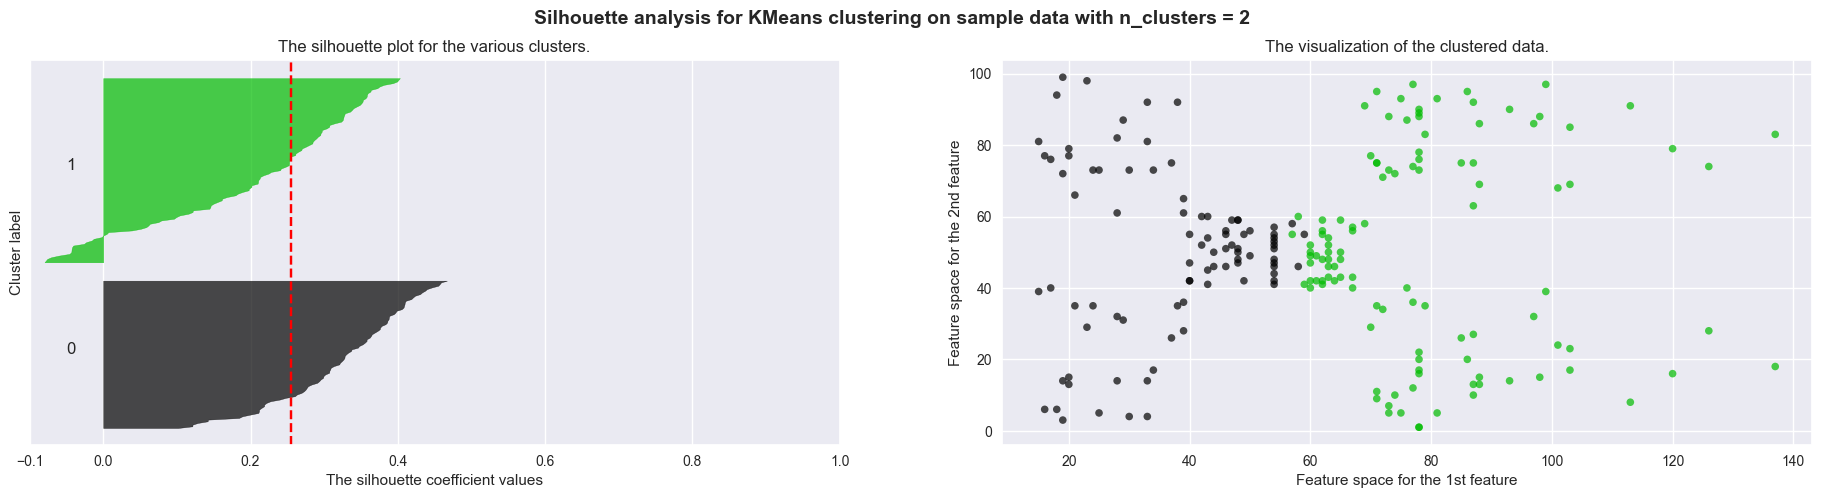

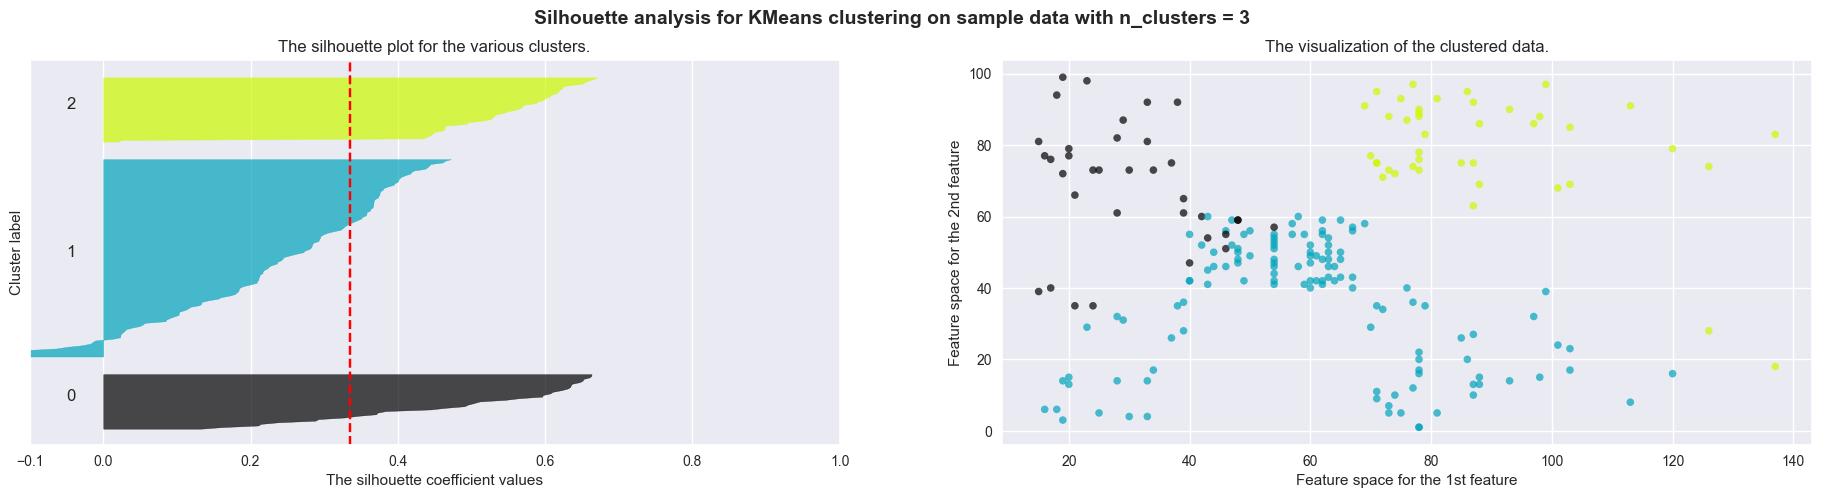

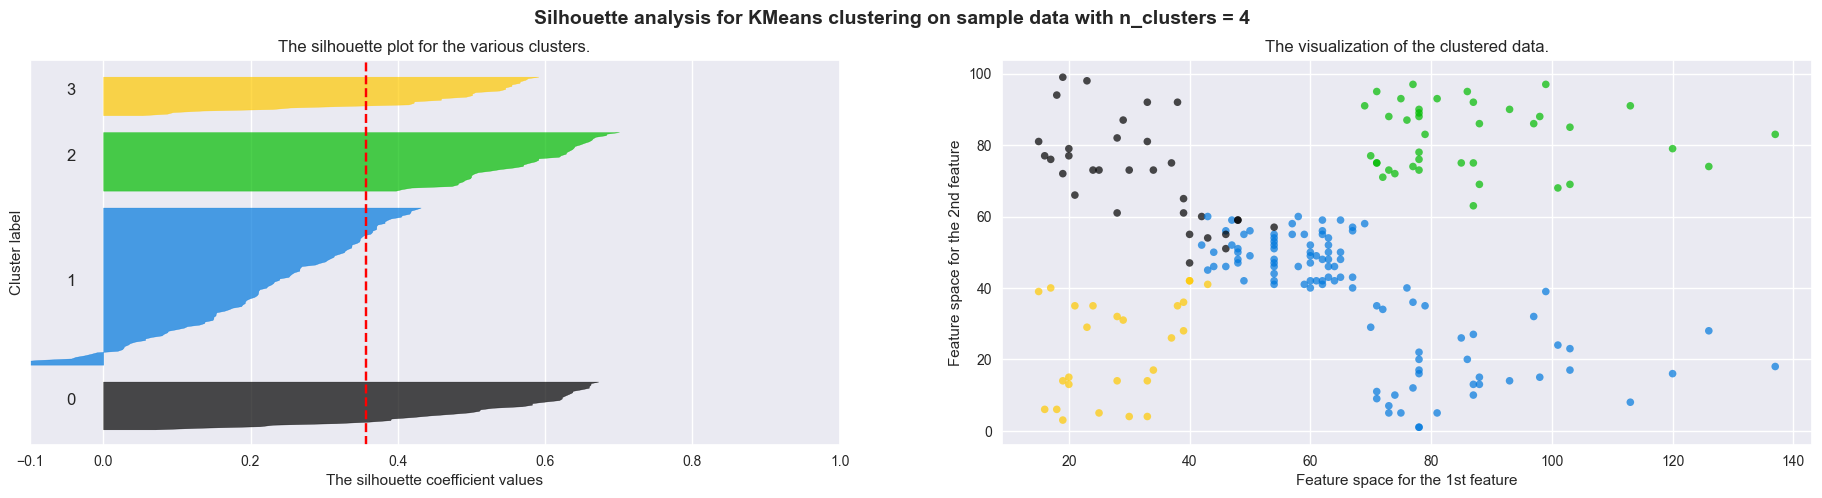

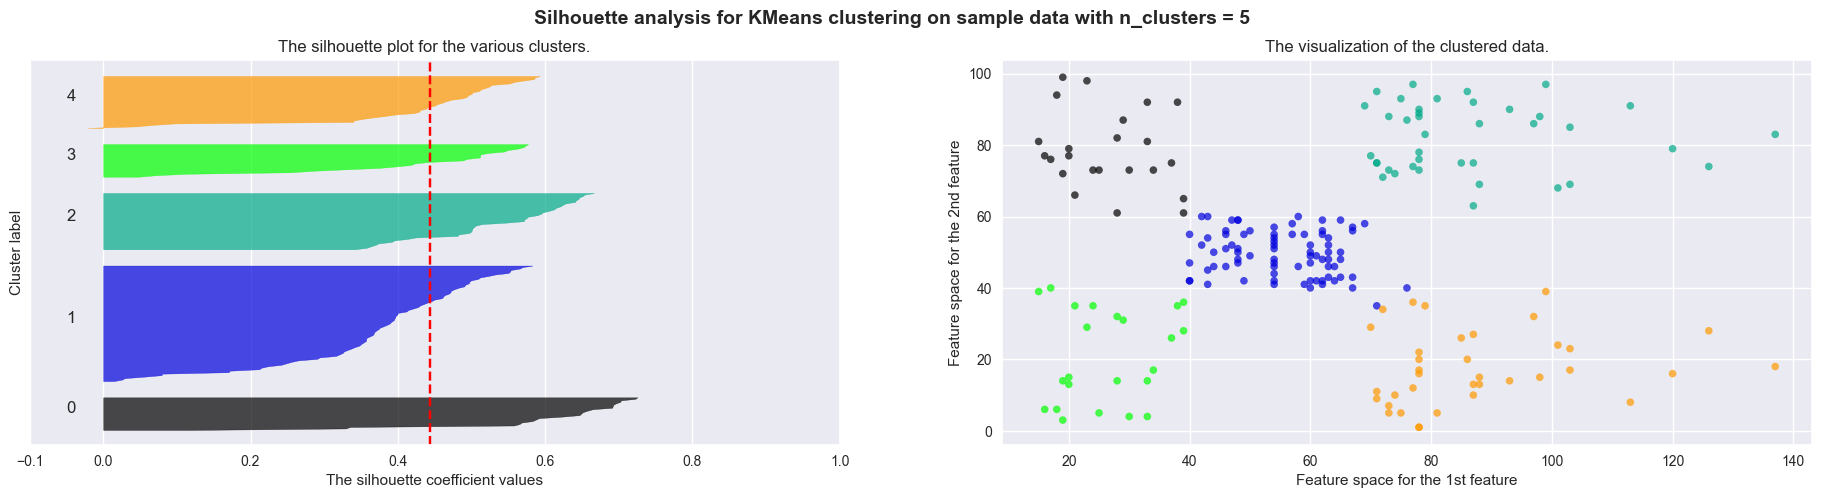

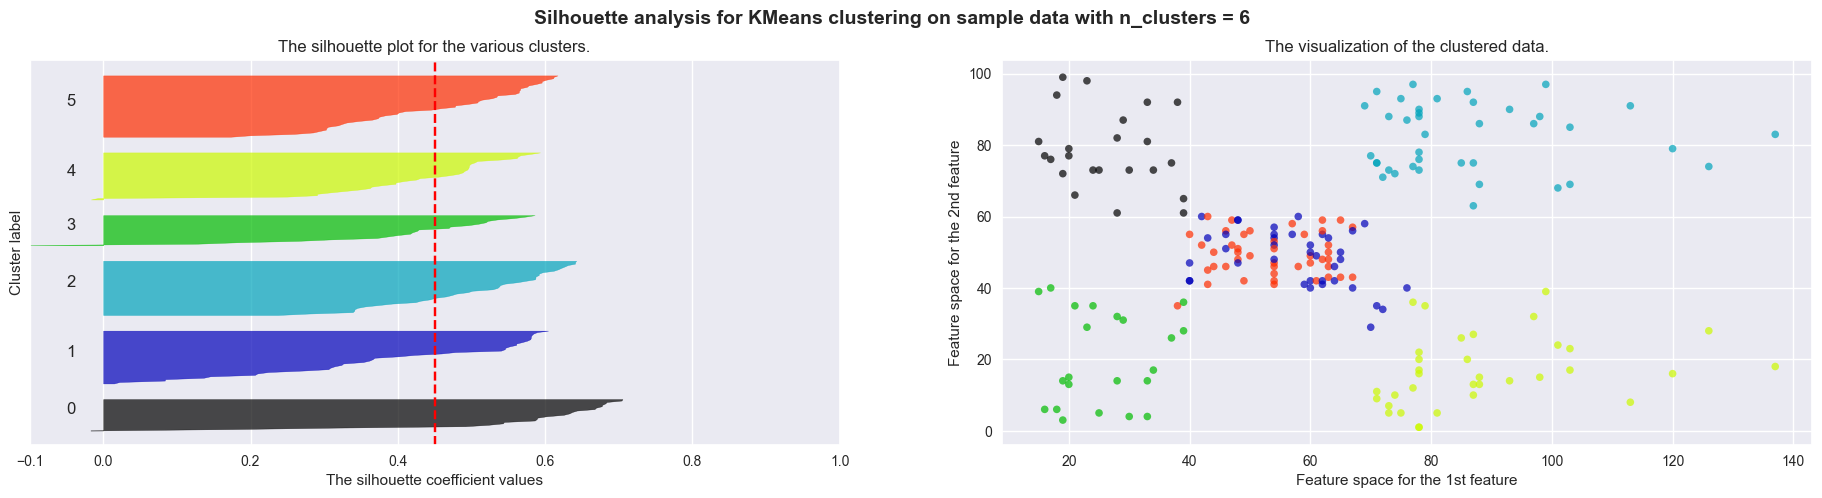

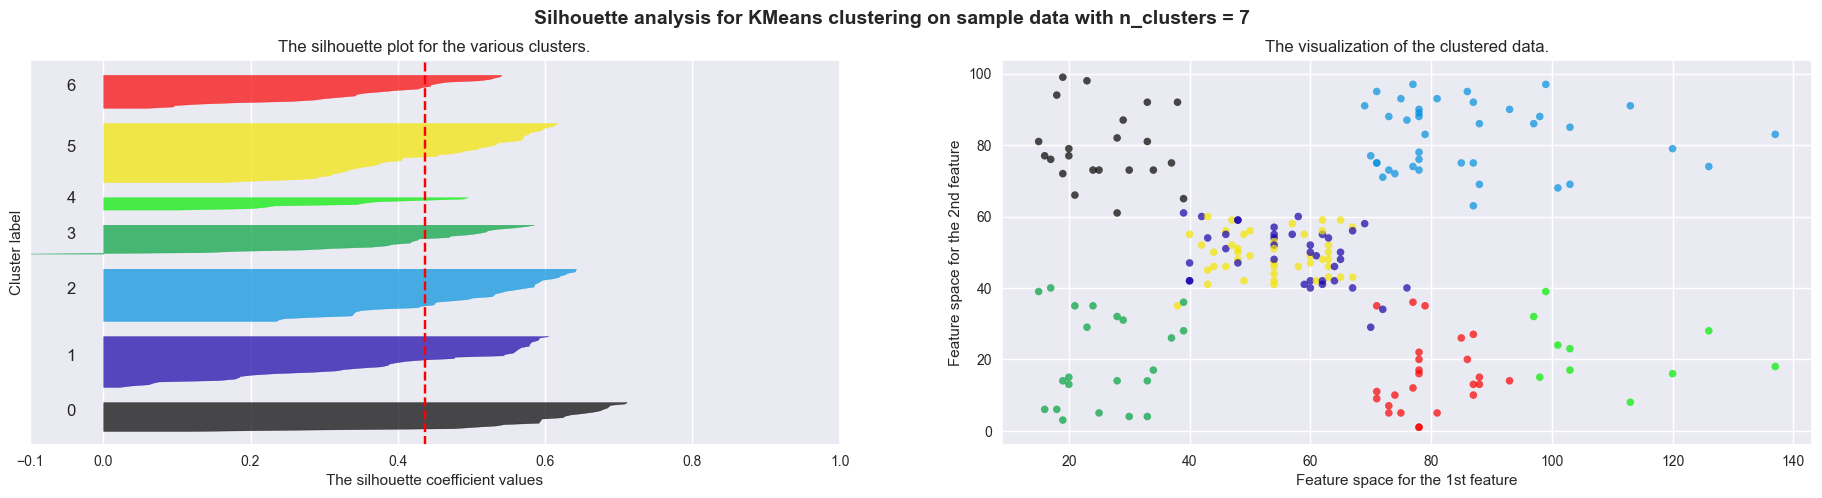

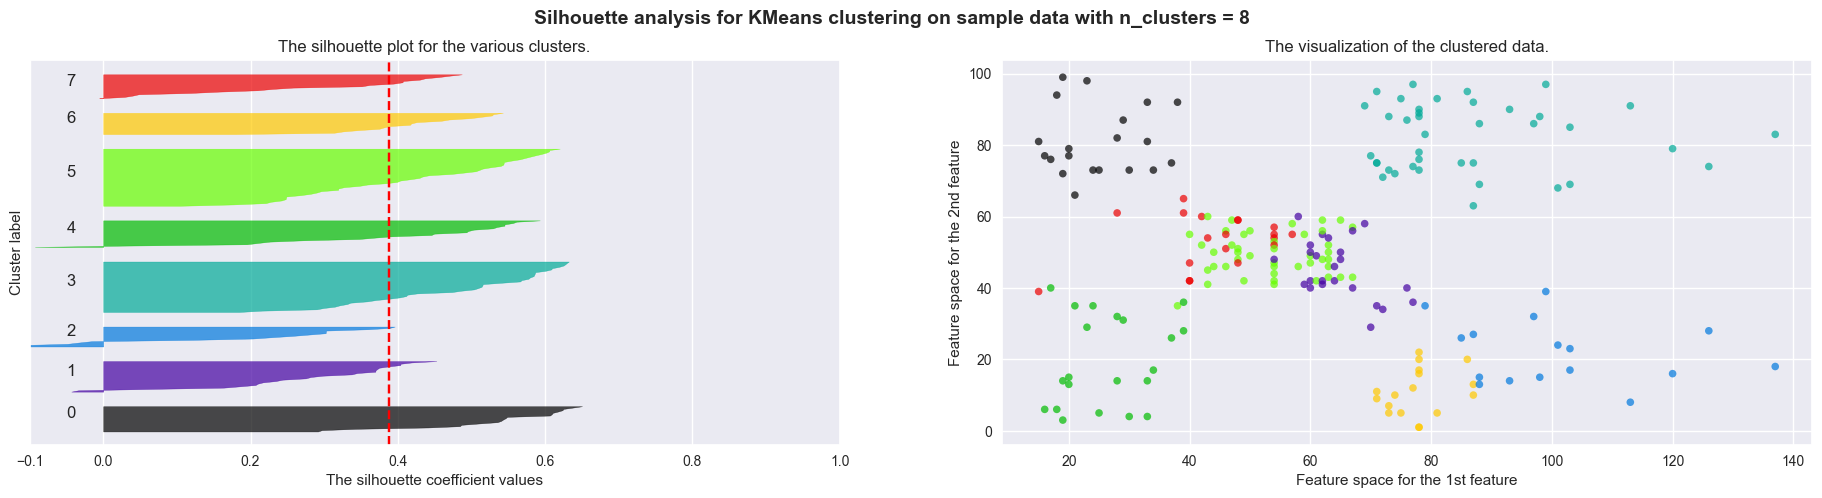

In [38]:
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(23, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df.iloc[:, 2], df.iloc[:, 3], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# davies_bouldin

In [258]:
db = {}
for i in range(2, 15):
    algorithm = KMeans(n_clusters = i)
    algorithm.fit(df)
    labels = algorithm.labels_
    db[i]=davies_bouldin_score(df,labels)

In [259]:
db

{2: 1.3573204663298608,
 3: 0.8750649004456997,
 4: 0.8918193554892447,
 5: 0.8222596417814184,
 6: 0.7475215820921539,
 7: 0.7892608969186633,
 8: 0.8573792756969942,
 9: 0.887386302293879,
 10: 0.969078560202149,
 11: 0.9710875759289603,
 12: 0.9708843254445051,
 13: 0.9610023139008655,
 14: 0.9402971382022957}

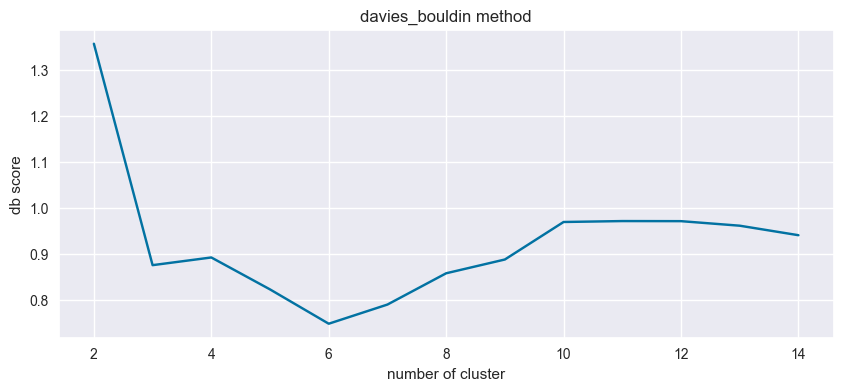

In [260]:
plt.figure(figsize=(10,4))
plt.plot(db.keys(), db.values())
plt.title("davies_bouldin method")
plt.ylabel("db score")
plt.xlabel("number of cluster")
plt.show()

# calinski_harabasz

In [261]:
ca = {}
for n in range(2, 15):
    algorithm = KMeans(n_clusters = n)
    algorithm.fit(df)
    labels = algorithm.labels_
    ca[n]=calinski_harabasz_score(df,labels)

In [263]:
ca

{2: 89.26031302776754,
 3: 113.66664386810282,
 4: 127.90972430651942,
 5: 150.94631598679595,
 6: 166.58349562213596,
 7: 162.14056670354333,
 8: 163.5664729622775,
 9: 156.11999791492508,
 10: 154.14058945020375,
 11: 149.50300274049172,
 12: 146.82609755312947,
 13: 141.6640491563596,
 14: 141.93513004728155}

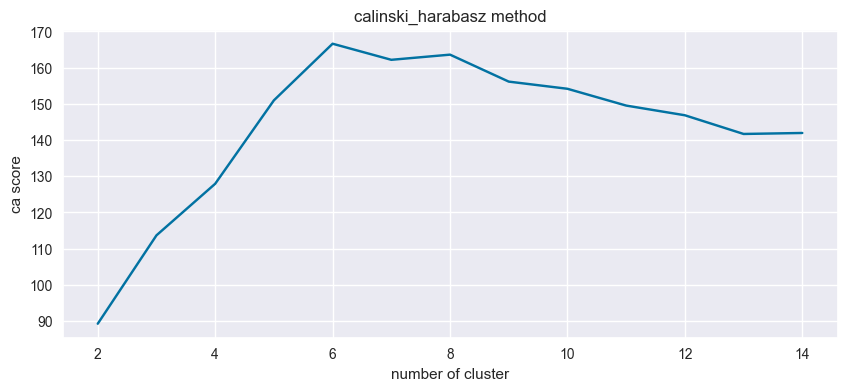

In [262]:
plt.figure(figsize=(10,4))
plt.plot(ca.keys(), ca.values())
plt.title("calinski_harabasz method")
plt.ylabel("ca score")
plt.xlabel("number of cluster")
plt.show()

# Hierarchical Clustering

In [5]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

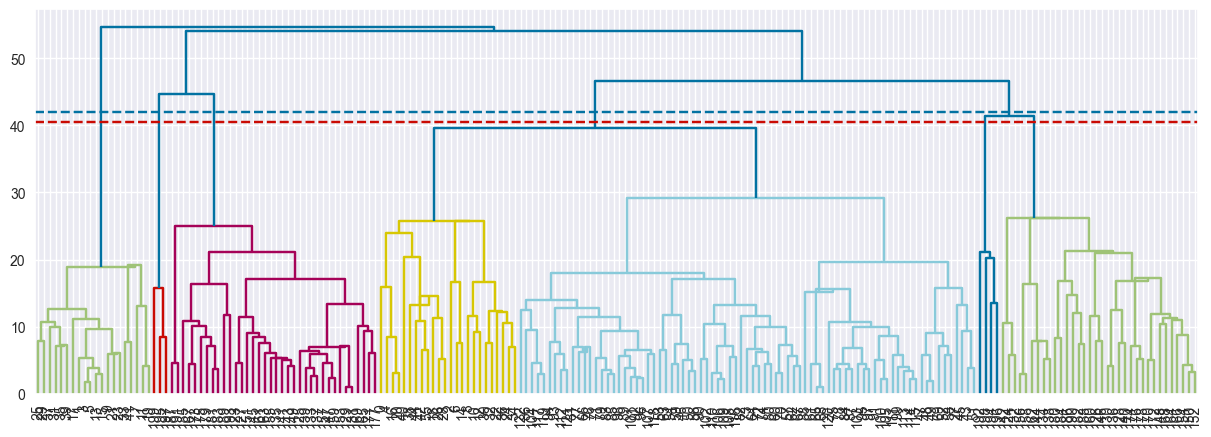

In [22]:
hc_average=linkage(df, method="centroid")

plt.figure(figsize=(15,5))
dendrogram(hc_average,
           leaf_font_size=10)

plt.axhline(y=40.5, color="r", linestyle="--")
plt.axhline(y=42, color="b", linestyle="--")

plt.show()

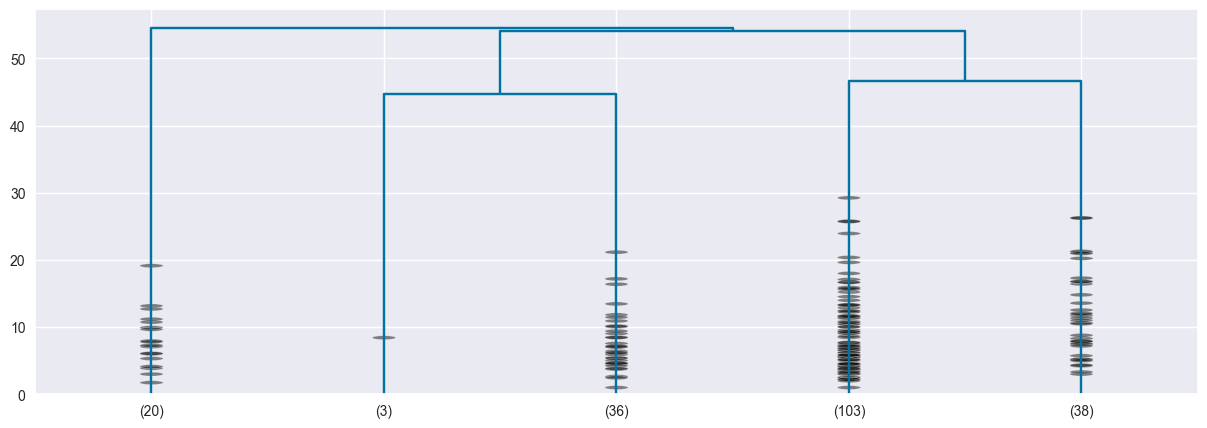

In [23]:
plt.figure(figsize=(15,5))
dendrogram(hc_average,
           truncate_mode="lastp",
           p=5,
           show_contracted=True,
           leaf_font_size=10);

In [27]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=5, linkage="average")
cluster.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [29]:
cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)